# Machine Exercise 2
## Miguel Luis Martinez, Juan Carlos Roldan, Jeryl Salas | AI 221 WZZQ | Shannon Batch
### University of the Philippines Diliman

# Problem 1: Palmer Penguin Species Data Set

# Loading the data

Our dataset consists of 344 rows of data from the Palmer Archipelago (in Antarctica) Penguin databank made available by Dr. Kristen Gorman of the Palmer Station, Antarctica LTER (Long Term Ecological Research Network). This dataset was accessed through Kaggle with the help of Parul Pandey at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data.

The dataset provides four body measurement features: beak or **culmen length** (in mm), **culmen depth** (in mm), **flipper length** (in mm), and **body mass** (in g).

In [1]:
import pandas as pd

df = pd.read_csv('datasets/penguins_size.csv')

In [2]:
print(df.shape)
df.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Problem 1a

First, we will be visualizing the 4 numerical features of the data using Seaborn’s pair plot, then show the points in different hues in accordance to the different species of penguin.

As shown here in the pairplot matrix, it looks as though in terms of the culmen length the Chinstrap and Gentoo species are distributed similarly, with the Chinstrap having more members with slightly longer beaks. The Adelie members have shorter beaks. In terms of culmen depth however, the Adelie is more similar to the Chinstrap. 

The Gentoo have decidedly bigger flippers and are also quite heavier across its distribution compared to either the Adelie and the Chinstrap. In terms of the flipper length and body mass, the Adelie and the Chinstrap look to have similar measurements and have similar distributions as well.

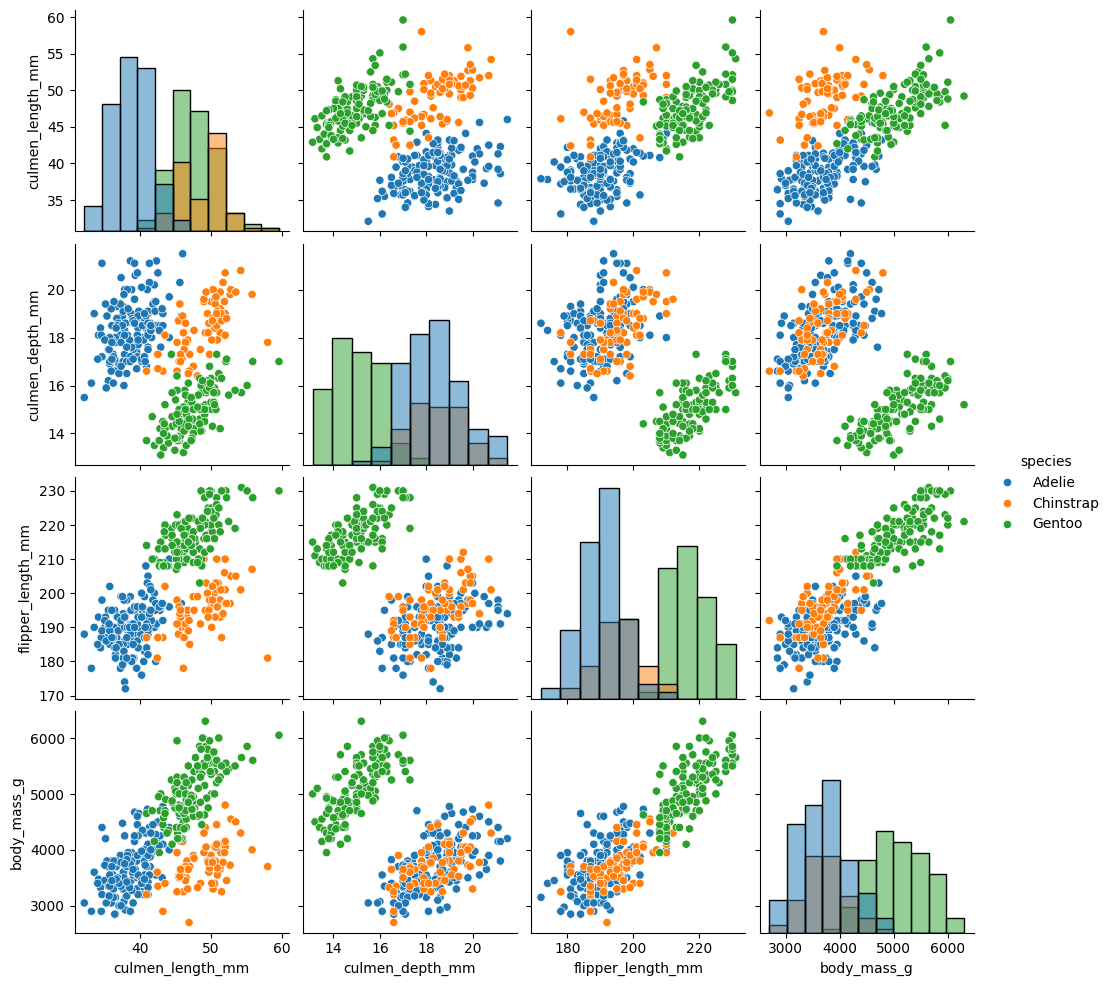

In [3]:
import seaborn as sns

sns.pairplot(df, hue='species', diag_kind='hist')

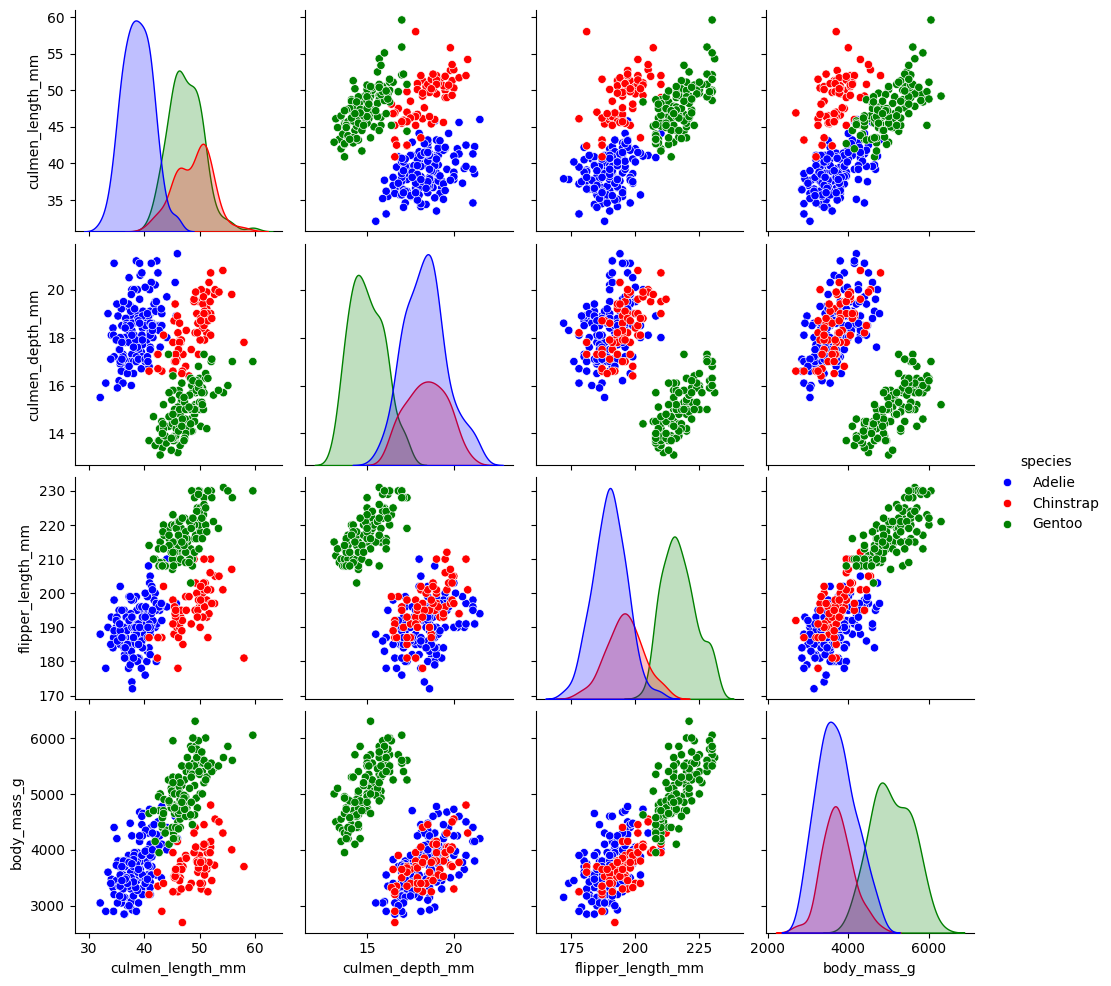

In [4]:
colors = ['blue', 'red', 'green'] 

# Creating a sns pairplot
sns.pairplot(df, hue='species', palette=colors, diag_kind="kde")

# Problem 1b

The next step is to run a pipeline on SVC with Standard Scaler. We will be training the model with the default settings for multi-class SVC in scikit learn. Finally, we will be reporting the accuracy, macro-averaged F1 Score, and the confusion matrix of the trained model separately for the training data and the test data.

First, we encode the labels (species) on the dataset. As there are missing data, we also use the KNN imputing technique to fill in the gaps in the dataset. Ultimately, we went with KNN imputing, because there were only a few missing datasets and it did not seem computationally expensive to do so. However, we believe simply dropping the empty sets would be viable as well.

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df[['species', *features]]
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Convert to numpy matrix and remove rows with NaN values
np_mtrx = df.values

nan_rows = np.isnan(np_mtrx).any(axis=1)
np_mtrx = np_mtrx[~nan_rows]
print(np_mtrx)

[[0.00e+00 3.91e+01 1.87e+01 1.81e+02 3.75e+03]
 [0.00e+00 3.95e+01 1.74e+01 1.86e+02 3.80e+03]
 [0.00e+00 4.03e+01 1.80e+01 1.95e+02 3.25e+03]
 ...
 [2.00e+00 5.04e+01 1.57e+01 2.22e+02 5.75e+03]
 [2.00e+00 4.52e+01 1.48e+01 2.12e+02 5.20e+03]
 [2.00e+00 4.99e+01 1.61e+01 2.13e+02 5.40e+03]]


/var/folders/6l/gzbxytfd20l428l626kzwtcr0000gn/T/ipykernel_12692/824839303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = label_encoder.fit_transform(df['species'])


In [6]:
from sklearn.impute import KNNImputer

# Convert to numpy matrix and remove rows with NaN values
np_mtrx = df.values
nan_rows = np.isnan(np_mtrx).any(axis=1)

imputer = KNNImputer(n_neighbors=5)
np_mtrx = np.where(np.isnan(np_mtrx), imputer.fit_transform(np_mtrx), np_mtrx)
print(np_mtrx)

[[0.00e+00 3.91e+01 1.87e+01 1.81e+02 3.75e+03]
 [0.00e+00 3.95e+01 1.74e+01 1.86e+02 3.80e+03]
 [0.00e+00 4.03e+01 1.80e+01 1.95e+02 3.25e+03]
 ...
 [2.00e+00 5.04e+01 1.57e+01 2.22e+02 5.75e+03]
 [2.00e+00 4.52e+01 1.48e+01 2.12e+02 5.20e+03]
 [2.00e+00 4.99e+01 1.61e+01 2.13e+02 5.40e+03]]


## Setting the strategy 

We then create three different classifiers which make use of three different strategies for multi-class classification: One Vs One (OVO) Classifier, One Vs Rest (OVR) Classifier, and Output Code Classifier.

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import (
    OneVsRestClassifier,
    OneVsOneClassifier,
    OutputCodeClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = np_mtrx[:, 1:]
y = df[['species']].values.ravel()

# Define the three classifiers
svm_ovo = OneVsOneClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
svm_ovr = OneVsRestClassifier(make_pipeline(StandardScaler(), SVC())).fit(X,y)
svm_ecoc = OutputCodeClassifier(make_pipeline(StandardScaler(), SVC()),
                                code_size=3).fit(X,y)

In [8]:
# Split dataset into 75% training and 25% testing
np.random.shuffle(np_mtrx)
split_index = int(0.75 * np_mtrx.shape[0])  
train_set = np_mtrx[:split_index]
test_set = np_mtrx[split_index:]
X_train = train_set[:, [1, 2]]
X_test = test_set[:, [1, 2]]
y_train = train_set[:, 0]
y_test = test_set[:, 0]

print("Number of items in X train:", X_train.shape[0])
print("Number of items in X test:", X_test.shape[0])
print("Number of items in y train:", y_train.shape[0])
print("Number of items in y test:", y_test.shape[0])

Number of items in X train: 258
Number of items in X test: 86
Number of items in y train: 258
Number of items in y test: 86


In [9]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def calculate_evaluation_metrics_on_classifier(classifier, name, X_train, X_test, y_train, y_test, metrics):
    metric_scores = {}

    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    train_scores = [train_accuracy, train_precision, train_recall, train_f1]
    test_scores = [test_accuracy, test_precision, test_recall, test_f1]
    
    metric_scores[name + ' (Train)'] = dict(zip(metrics, train_scores))
    metric_scores[name + ' (Test)'] = dict(zip(metrics, test_scores))
    return y_train_pred, y_test_pred, metric_scores


def print_training_scores_on_classifier(classifier, X_train, X_test, y_train, y_test, metrics):
    pass    

def print_classifier_evaluation_metrics(classifiers, X_train, X_test, y_train, y_test):
    title = "\033[1mPerformance Metrics per classifier\033[0m"
    width = 60
    print("_" * 55)
    print(title.center(width))
    print("_" * 55)
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    
    y_train_preds = []
    y_test_preds = []
    metric_scores = {}  # Dictionary to store metric scores
    
    # calculate evaluation metrics for each classifier
    for name, clf in classifiers.items():
        ytrp, ytep, ms = calculate_evaluation_metrics_on_classifier(
            clf,
            name,
            X_train,
            X_test,
            y_train,
            y_test,
            metrics,
        )
        y_train_preds.append(ytrp)
        y_test_preds.append(ytep)
        metric_scores = {**metric_scores, **ms}
        

    # Print training scores
    print("\n\n\033[1mTraining Scores\033[0m")
    print("_" * 55)
    print("\n\n{:<14}    {:<10} {:<10} {:<10} {:<10}".format("Classifier", *metrics))
    print("-" * 55)
    i =  0
    for classifier_name, scores in metric_scores.items():
        if 'Train' in classifier_name:  
            i += 1
            if i == 3:
                print("{:<14}   {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))
            else:
                print("{:<14}    {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))


    # Printing training confusion matrix
    print("\n\n{:<10}    {:<10}".format("Classifier","Confusion Matrix"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_train_preds):
        cm = confusion_matrix(y_train, y_pred)
        print("{:<14}".format(name))  
        
        for row in cm:
            print(" " * 14, " ".join(["{:>3}".format(item) for item in row]))  
        
        print()  
        
        
    # Printing training classification reports
    print("\n\n{:<10}             {:<10}".format("Classifier","Classification Report"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_train_preds):
        print("\n\n{:<10}".format(name))
        print(classification_report(y_train, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))
        
        
    # Print testing scores
    print("\n\n\033[1mTesting Scores\033[0m")
    print("_" * 55)
    print("\n\n{:<14}    {:<10} {:<10} {:<10} {:<10}".format("Classifier", *metrics))
    print("-" * 55)
    i = 0
    for classifier_name, scores in metric_scores.items():
        if 'Test' in classifier_name:  # Check if it's a testing score
            i += 1
            if i == 3:
                print("{:<14}   {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))
            else:
                print("{:<14}    {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(classifier_name, *scores.values()))

    # Print test confusion matrix
    print("\n\n{:<10}    {:<10}".format("Classifier","Confusion Matrix"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_test_preds):
        cm = confusion_matrix(y_test, y_pred)
        print("{:<14}".format(name))  
        
        for row in cm:
            print(" " * 14, " ".join(["{:>3}".format(item) for item in row]))  
        
        print()  

    # Printing test classification reports
    print("\n\n{:<10}             {:<10}".format("Classifier","Classification Report"))
    print("-" * 55)
    
    for name, y_pred in zip(classifiers.keys(), y_test_preds):
        print("\n\n{:<10}".format(name))
        print(classification_report(y_test, y_pred, target_names=['Adelie', 'Gentoo', 'Chinstrap']))
    
    return classifiers

In [10]:
# These are the classifiers that are used
classifiers = {
    'svm_ovo': svm_ovo,
    'svm_ovr': svm_ovr,
    'svm_ecoc': svm_ecoc
}

classifiers = print_classifier_evaluation_metrics(classifiers, X_train, X_test, y_train, y_test)


_______________________________________________________
         Performance Metrics per classifier         
_______________________________________________________


Training Scores
_______________________________________________________


Classifier        Accuracy   Precision  Recall     F1-score  
-------------------------------------------------------
svm_ovo (Train)    0.9651     0.9579     0.9538     0.9557    
svm_ovr (Train)    0.9574     0.9504     0.9409     0.9454    
svm_ecoc (Train)   0.9535     0.9511     0.9345     0.9419    


Classifier    Confusion Matrix
-------------------------------------------------------
svm_ovo       
               117   1   0
                 3  47   2
                 0   3  85

svm_ovr       
               117   1   0
                 4  45   3
                 0   3  85

svm_ecoc      
               117   1   0
                 5  44   3
                 1   2  85



Classifier             Classification Report
-------------------------

# Problem 1c

At this point we will be showing the decision boundaries in the space of culmen length vs flipper length.




Decision Boundary Display for Training set
-------------------------------------------------------


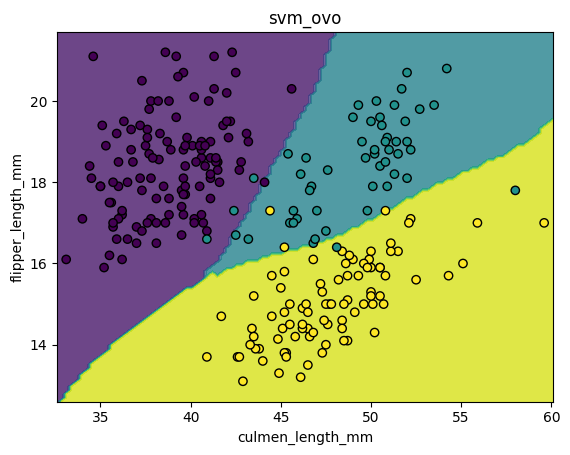

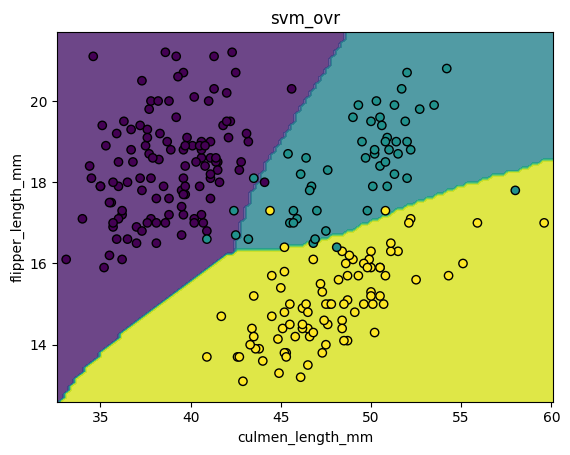

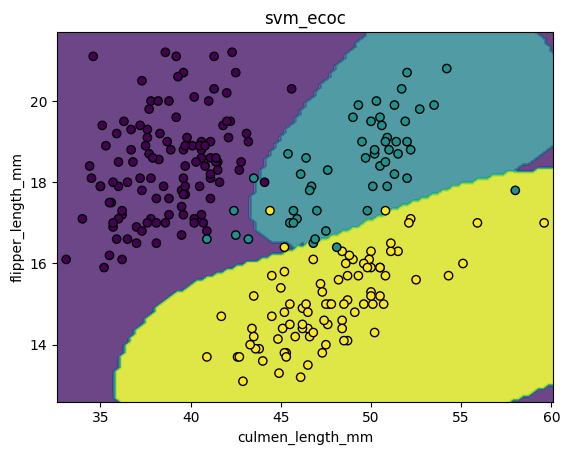



Decision Boundary Display for Testing set
-------------------------------------------------------


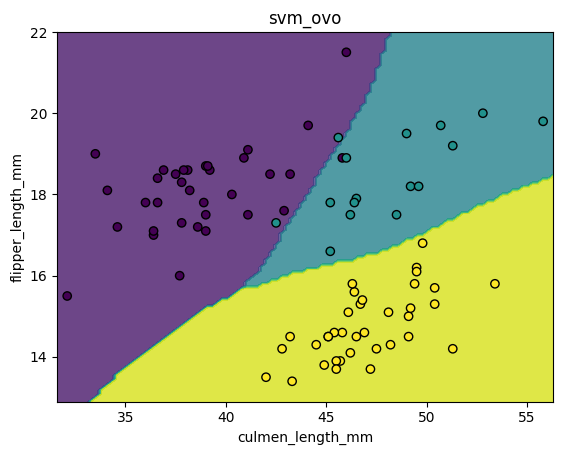

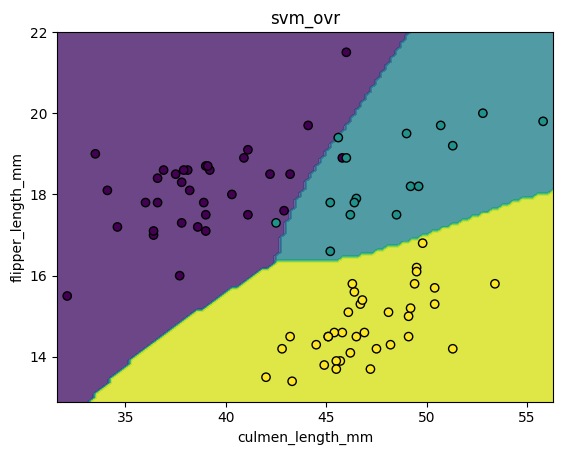

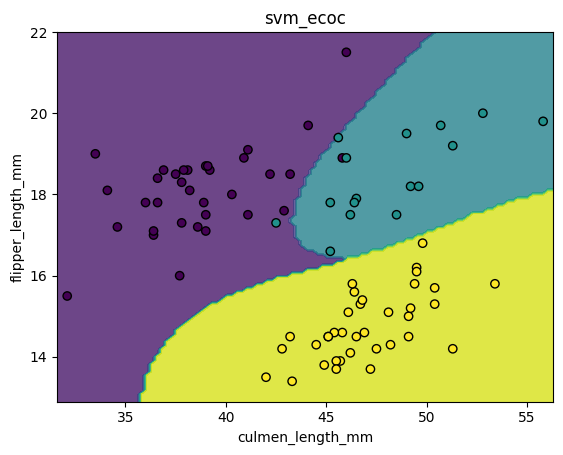

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Plot decision boundaries for training set
print("\n\n\nDecision Boundary Display for Training set")
print("-" * 55)
for name, clf in classifiers.items():
    DecisionBoundaryDisplay.from_estimator(clf, X_train, alpha=0.8, eps=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
    plt.xlabel('culmen_length_mm')
    plt.ylabel('flipper_length_mm')
    plt.title(name)
    plt.show()
    
# Plot decision boundaries for test set
print("\n\nDecision Boundary Display for Testing set")
print("-" * 55)
for name, clf in classifiers.items():
    DecisionBoundaryDisplay.from_estimator(clf, X_test, alpha=0.8, eps=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k")
    plt.xlabel('culmen_length_mm')
    plt.ylabel('flipper_length_mm')
    plt.title(name)
    plt.show()

# Problem 1d

We will now be showing the use of different parameters (box constraint, kernel function, kernel parameter, and multi-class strategy) integrated into the SVC. We diversified the use of the box constraint (`C` in SVC) , kernel function (`kernel` in SVC), and the kernel parameter (`gamma` in SVC) hyperparameters across the three different strategies for multi-class classification. We used randomized 3-fold cross-validation sampling only 20 different combinations/iterations of the parameters for each of the three strategies. We had 3 choices of kernel in Linear, RBF, and Sigmoid.

Across the different strategies, the **RBF** kernel was the best performing strategy for OVR and OVO, and **sigmoid** performing better in the Output Code classifiers. The best performing model had a best overall score of 0.4477 and best overall parameters of kernel function as "RBF", Gamma as 1.0, and C as 0.7743.

In [18]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

np.random.seed(42)

Cs = np.logspace(-1, 1, 10)
gammas = np.logspace(-3, 0, 10)

print("C: ", Cs)
print("Gamma: ", gammas)
      
param_dist = {
    'estimator__C': Cs,
    'estimator__kernel': ['linear', 'rbf', 'sigmoid'],
    'estimator__gamma': gammas,
}


classifiers = [
    ('One-vs-Rest (OvR)', OneVsRestClassifier(SVC())),
    ('One-vs-One (OvO)', OneVsOneClassifier(SVC())),
    ('OutputCode', OutputCodeClassifier(SVC())),
]

best_score = -1
best_params = None
best_classifier = None

for name, clf in classifiers:
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
    random_search.fit(X, y)

    score = random_search.best_score_
    params = random_search.best_params_
    print(f"Best score for {name}: {score}")
    print(f"Best parameters for {name}: {params}")
    print()
    
    if score > best_score:
        best_score = score
        best_params = params
        best_classifier = name

print(f"Best overall classifier: {best_classifier}")
print(f"Best overall score: {best_score}")
print(f"Best overall parameters: {best_params}")


C:  [ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]
Gamma:  [0.001      0.00215443 0.00464159 0.01       0.02154435 0.04641589
 0.1        0.21544347 0.46415888 1.        ]
Best score for One-vs-Rest (OvR): 0.4418764302059497
Best parameters for One-vs-Rest (OvR): {'estimator__kernel': 'rbf', 'estimator__gamma': 1.0, 'estimator__C': 0.774263682681127}

Best score for One-vs-One (OvO): 0.44477498093058737
Best parameters for One-vs-One (OvO): {'estimator__kernel': 'rbf', 'estimator__gamma': 1.0, 'estimator__C': 0.774263682681127}

Best score for OutputCode: 0.4418510043224002
Best parameters for OutputCode: {'estimator__kernel': 'sigmoid', 'estimator__gamma': 0.004641588833612777, 'estimator__C': 3.593813663804626}

Best overall classifier: One-vs-One (OvO)
Best overall score: 0.44477498093058737
Best overall parameters: {'estimator__kernel': 'rbf', 'estimator__gamma': 1.0, 'estimator__C': 0.774263682681127}
CPU 

# Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

In [1]:
#Import libraries
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, root_mean_squared_error, mean_squared_error,r2_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.impute import KNNImputer
from IPython.display import display, HTML

## Loading the data

The Seoul Bike Sharing dataset consists of 8760 rows of data with 13 features each, and was taken from the UC Irvine Machine Learning Repository at https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand. However, only 10 of the features, namely the Rented Bike Count (used as a target variable), Hour, Temperature, Humidity, WIndspeed, Visibility, Dewpoint, Solar Radiation, Snowfall, and Rainfall were used in this problem, and only rows with a Season value of "Winter" were used.

In [2]:
#load the Seoul Bike Sharing Dataset
df_b_raw = pd.read_csv("./datasets/SeoulBikeData.csv",encoding_errors="replace")
print("Raw data")
display(df_b_raw.head())
display(pd.concat((df_b_raw.dtypes.rename("type"),df_b_raw.isna().any().rename("has NaN")),axis=1))
print(df_b_raw.columns[1:11]) #verify the column labels in use
#preprocess data and remove NaN values
df_b = df_b_raw.loc[df_b_raw["Seasons"]=="Winter"].iloc[:,1:11]
df_b.dropna(inplace=True)
print("Preprocessed data")
display(df_b.head())

Raw data


,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


,type,has NaN
Date,object,False
Rented Bike Count,int64,False
Hour,int64,False
Temperature(�C),float64,False
Humidity(%),int64,False
Wind speed (m/s),float64,False
Visibility (10m),int64,False
Dew point temperature(�C),float64,False
Solar Radiation (MJ/m2),float64,False
Rainfall(mm),float64,False


Index(['Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')
Preprocessed data


,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


## Problem 2.a.
* Visualize the dataset using boxplots
For this problem, we will be visualizing the features of the reduced dataset using Seaborn boxplots. The first boxplot covers all of the features in the dataset, while the next two boxplots show only those features with a very low spread with respect to the most significant features.

In this case, the features with the largest spread are the Rented Bike Count and the Temperature. This shows the need for a standard scaler to normalize the data and preventing these features from overshadowing the rest.

,index,variable,value
0,0,Rented Bike Count,254.0
1,1,Rented Bike Count,204.0
2,2,Rented Bike Count,173.0
3,3,Rented Bike Count,107.0
4,4,Rented Bike Count,78.0
...,...,...,...
21595,2155,Snowfall (cm),0.0
21596,2156,Snowfall (cm),0.0
21597,2157,Snowfall (cm),0.0
21598,2158,Snowfall (cm),0.0


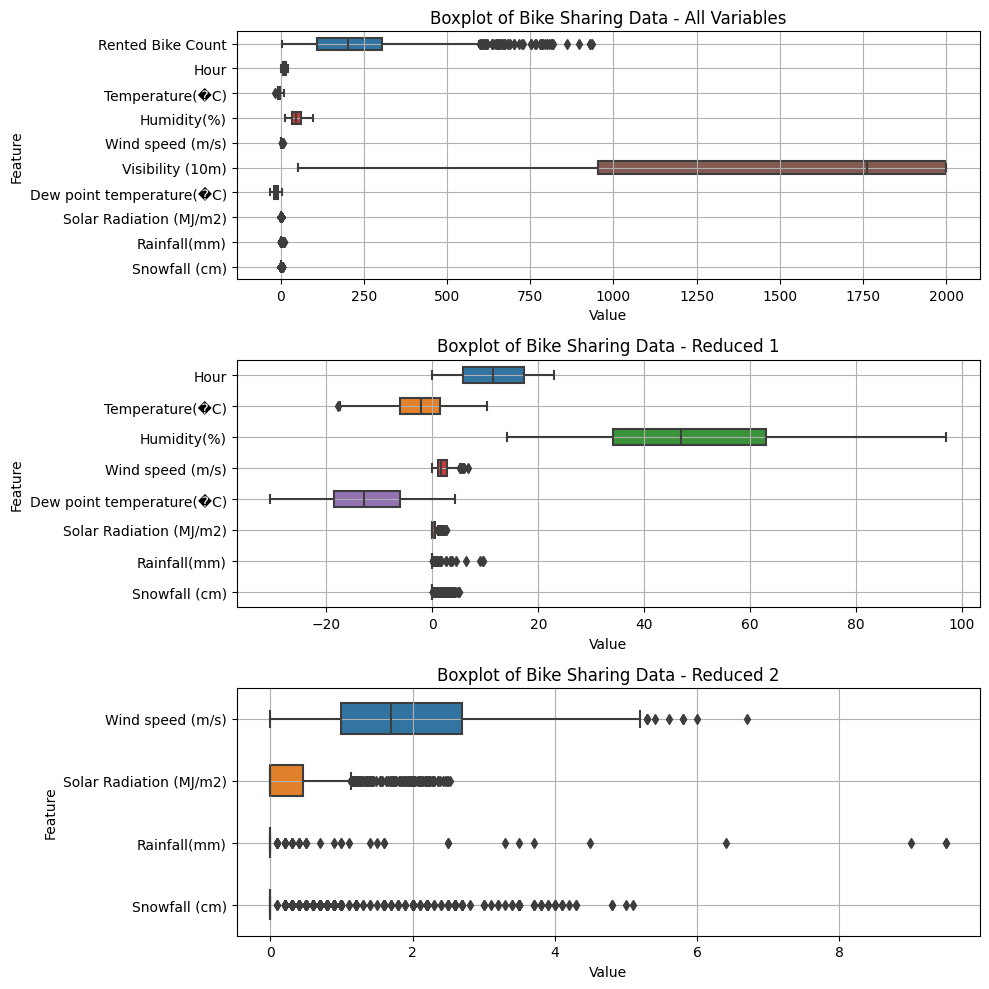

In [3]:

melted_df_b = pd.melt(df_b.reset_index(),id_vars="index",value_vars=df_b.columns[:])
display(melted_df_b)
#Remove the two largest features to visualize the rest of the data
df_b_1 = df_b.drop([df_b.columns[0],df_b.columns[5]],axis=1)
melted_df_b_1 = pd.melt(df_b_1.reset_index(),id_vars="index",value_vars=df_b_1.columns[:])
#Remove the next two largest features to visualize the rest of the data
df_b_2 = df_b_1.drop([df_b_1.columns[0],df_b_1.columns[1],df_b_1.columns[2],df_b_1.columns[4]],axis=1)
melted_df_b_2 = pd.melt(df_b_2.reset_index(),id_vars="index",value_vars=df_b_2.columns[:])

#plot all 3 sets as boxplots
plt.figure(figsize=(10,10))
angle=30
plt.subplot(311)
sns.boxplot(data=melted_df_b,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - All Variables")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(312)
sns.boxplot(data=melted_df_b_1,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - Reduced 1")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.subplot(313)
sns.boxplot(data=melted_df_b_2,width=0.5,orient='h',x="value",y="variable")
plt.title("Boxplot of Bike Sharing Data - Reduced 2")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.grid()
plt.tight_layout()
plt.show()


## Problem 2.b.
* Split samples into 70% training and 30% testing data randomly with stratify=y.

A fixed seed is used for consistency. Note that the same training-testing data split will be reused for problems 2.c. and 2.d.

In [4]:
bike_split_seed = 413094539 #seed used for the report
#uncomment to generate a new seed
#bike_sharing_seed = np.random.randint((2**31)-1)
print(f"Bike Sharing Train-test Splitter Seed: {bike_split_seed}")

#split dataframe to data and labels
X = df_b.iloc[:,1:]
y = df_b.loc[:,["Rented Bike Count"]]
display(X)
display(y)
#perform train test split : 70-30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=bike_split_seed)
print(f"Number of training samples: {len(X_train)} -> {round(100.0*len(X_train)/len(X),2)}%")
print(f"Number of testing samples: {len(X_test)} -> {round(100.0*len(X_test)/len(X),2)}%")

Bike Sharing Train-test Splitter Seed: 413094539


,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2155,19,2.5,95,1.9,838,1.7,0.0,0.0,0.0
2156,20,2.7,96,1.5,1479,2.1,0.0,0.0,0.0
2157,21,2.4,95,2.5,1349,1.6,0.0,9.0,0.0
2158,22,2.3,96,1.9,1207,1.7,0.0,0.0,0.0


,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
2155,19
2156,8
2157,10
2158,13


Number of training samples: 1512 -> 70.0%
Number of testing samples: 648 -> 30.0%


* Construct pipeline with Standard Scaler and SVR
* Compute RMSE

In [5]:
#define hyperparameters
kernel = "rbf"
gamma = 0.1
epsilon = 10
#make pipeline with parameters
bike_svr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("svr",SVR(kernel=kernel,gamma=gamma,epsilon=epsilon))
])

#train data
bike_svr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from logistic regression
train_svr_prediction = bike_svr_pipeline.predict(X_train)
test_svr_prediction = bike_svr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_svr_rmse = root_mean_squared_error(y_train,train_svr_prediction)
test_svr_rmse = root_mean_squared_error(y_test,test_svr_prediction)
#compute R2 score of pipeline
train_svr_r2 = r2_score(y_train,train_svr_prediction)
test_svr_r2 = r2_score(y_test,test_svr_prediction)

print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Epsilon used: {epsilon}")
print(f"Training Set Error: {round(train_svr_rmse,4)}")
print(f"Testing Set Error: {round(test_svr_rmse,4)}")

Kernel used: rbf
Kernel parameter used: 0.1
Epsilon used: 10
Training Set Error: 136.4787
Testing Set Error: 127.9394


## Problem 2.c.
* Repeat for KRR instead of SVR.
* Construct pipeline with Standard Scaler and KRR
* Compute RMSE

In [6]:
#define parameters
alpha = 1
kernel = "rbf"
gamma = 0.1

#make pipeline with parameters
bike_krr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("krr",KernelRidge(alpha=alpha,kernel=kernel,gamma=gamma))
])

#train data
bike_krr_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_krr_prediction = bike_krr_pipeline.predict(X_train)
test_krr_prediction = bike_krr_pipeline.predict(X_test)

#compute RMSE of pipeline
train_krr_rmse = root_mean_squared_error(y_train,train_krr_prediction)
test_krr_rmse = root_mean_squared_error(y_test,test_krr_prediction)
#compute R2 score of pipeline
train_krr_r2 = r2_score(y_train,train_krr_prediction)
test_krr_r2 = r2_score(y_test,test_krr_prediction)

print(f"Kernel used: {kernel}")
print(f"Kernel parameter used: {gamma}")
print(f"Alpha used: {alpha}")
print(f"Training Set Error: {round(train_krr_rmse,4)}")
print(f"Testing Set Error: {round(test_krr_rmse,4)}")

Kernel used: rbf
Kernel parameter used: 0.1
Alpha used: 1
Training Set Error: 111.4925
Testing Set Error: 108.7445


## Problem 2.d.
* Repeat for Linear Regression instead of SVR
* Construct pipeline with Standard Scaler and Linear Regression
* Compute RMSE

In [7]:
#make pipeline
bike_lin_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("linreg",LinearRegression())
])

#train data
bike_lin_pipeline.fit(X_train,y_train.values.ravel())

#get predicted values from linear regression
train_lin_prediction = bike_lin_pipeline.predict(X_train)
test_lin_prediction = bike_lin_pipeline.predict(X_test)

#compute RMSE of pipeline
train_lin_rmse = root_mean_squared_error(y_train,train_lin_prediction)
test_lin_rmse = root_mean_squared_error(y_test,test_lin_prediction)
#compute R2 score of pipeline
train_lin_r2 = r2_score(y_train,train_lin_prediction)
test_lin_r2 = r2_score(y_test,test_lin_prediction)

print(f"Training Set Error: {round(train_lin_rmse,4)}")
print(f"Testing Set Error: {round(test_lin_rmse,4)}")

Training Set Error: 127.7805
Testing Set Error: 119.9274


* Compare results for all three models

As shown in the tables and figures below, the Linear Regression model had the least Mean Square Error, followed by the SVR model, and finally the least accurate was the KRR model. This is also reflected in the R2 scores of the three models.

,Train RMSE,Test RMSE
SVR,136.478692,127.939366
KRR,111.492531,108.744489
Linear Regression,127.780504,119.927434


,Train R2 Score,Test R2 Score
SVR,0.199049,0.221198
KRR,0.465475,0.437357
Linear Regression,0.297890,0.315685


Text(0, 0.5, 'RMSE')

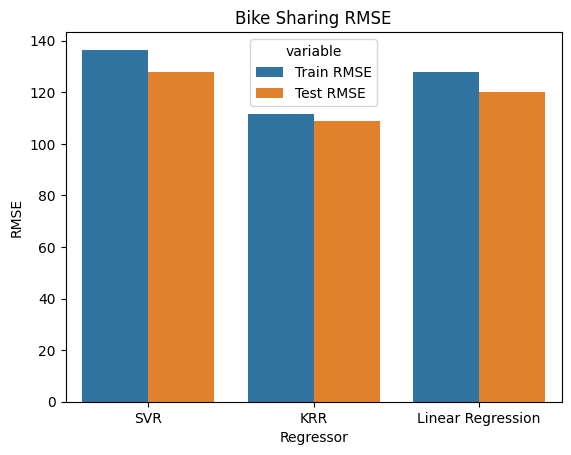

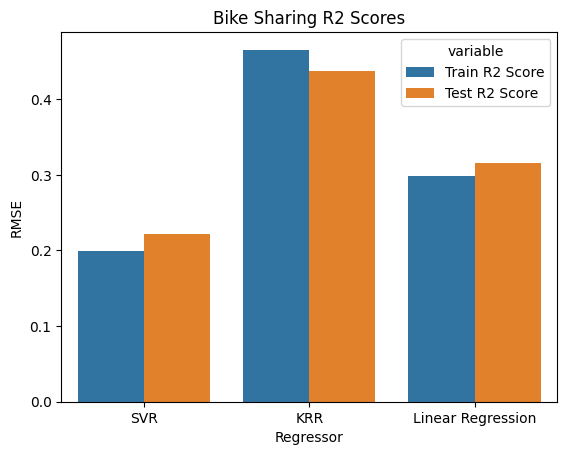

In [8]:
bike_train_rmse=[train_svr_rmse,train_krr_rmse, train_lin_rmse]
bike_test_rmse=[test_svr_rmse,test_krr_rmse, test_lin_rmse]
bike_train_r2=[train_svr_r2,train_krr_r2, train_lin_r2]
bike_test_r2=[test_svr_r2,test_krr_r2, test_lin_r2]
bike_errors = pd.DataFrame(
    data={"Train RMSE":bike_train_rmse,
          "Test RMSE":bike_test_rmse,
          },
    index=["SVR","KRR","Linear Regression"])

bike_scores = pd.DataFrame(
    data={"Train R2 Score":bike_train_r2,
          "Test R2 Score":bike_test_r2,
    },
    index=["SVR","KRR","Linear Regression"])

display(bike_errors)
display(bike_scores)

melted_bike_errors = pd.melt(bike_errors.reset_index(),id_vars="index",value_vars=bike_errors.columns[:])
fig2,ax2 = plt.subplots()
ax2 = sns.barplot(melted_bike_errors,x="index",y="value",hue="variable")
ax2.set_title("Bike Sharing RMSE")
ax2.set_xlabel("Regressor")
ax2.set_ylabel("RMSE")

melted_bike_scores = pd.melt(bike_scores.reset_index(),id_vars="index",value_vars=bike_scores.columns[:])
fig3,ax3 = plt.subplots()
ax3 = sns.barplot(melted_bike_scores,x="index",y="value",hue="variable")
ax3.set_title("Bike Sharing R2 Scores")
ax3.set_xlabel("Regressor")
ax3.set_ylabel("RMSE")
